In [6]:
# Samantha L. Misurda
# HW3

#connect to s3 with the sdk
from boto.s3.connection import S3Connection
from PIL import Image 
import webbrowser
import datetime
import boto3
from boto.s3.key import Key

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
client = boto3.client('rekognition','us-east-1')
%matplotlib inline

#You must change these to your own password and bucket information.
conn = S3Connection()

from matplotlib.pyplot import imshow
import json
from pprint import pprint

%matplotlib inline
import matplotlib
matplotlib.rc("savefig", dpi=100)
import cv2
from collections import namedtuple

#only run this once or you will freeze and have to restart the notebook server
#to get this working properly, you'll need to change the 'conn = ' line in mxnet_mtcnn_face_detection
from main_rekognition_filter import getdetector
from main_rekognition_filter import countfaces
#change this to the location of your model folder
#detector=getdetector('model')

print ('done')

done


In [7]:
#print the bucket name and contents
mybuckets = conn.get_all_buckets()
print(len(mybuckets))

print ('print info about this bucket')
#this bucket is read-public, so feel free to follow this example code without changing 
#anything besides public/private key
bucketname='rekognitionbotoartifact'
s3bucket = conn.get_bucket(bucketname)
print(s3bucket)
size = 0
count = 0
for key in s3bucket.list():
    size += key.size
    count += 1
 
print ("%.3f GB" % (size*1.0/1024/1024/1024))
print ("num files: "+str(count))

for key in s3bucket.list():
        print ("{name}\t{size}\t{modified}".format(
                name = key.name,
                size = key.size,
                modified = key.last_modified,
                ))

1
print info about this bucket
<Bucket: rekognitionbotoartifact>
0.002 GB
num files: 23
Cano1.png	12302	2017-05-30T17:38:41.000Z
beachpic.png	92369	2017-06-21T14:30:49.000Z
canoandcruz.png	102642	2017-05-30T17:38:41.000Z
canoandjayz.png	50004	2017-05-30T17:38:41.000Z
canoandreyes.png	81886	2017-05-30T17:38:42.000Z
cat_picture.png	113078	2017-06-19T20:30:25.000Z
cruz.png	18921	2017-05-30T17:38:42.000Z
danes.jpg	17248	2017-07-31T15:29:50.000Z
dog_pic.png	56996	2017-06-19T20:30:27.000Z
embiidandokafor.png	94450	2017-05-30T17:38:42.000Z
embiidandsimmons.png	161768	2017-05-30T17:38:43.000Z
foursixers.png	77603	2017-05-30T17:38:44.000Z
hinkie.png	163536	2017-05-30T17:38:44.000Z
hinkieandbrown.png	48090	2017-05-30T17:38:45.000Z
hinkieandnoel.png	316380	2017-05-30T17:38:45.000Z
hinkieandsaric.png	228041	2017-05-30T17:38:46.000Z
hinkiembiid.png	101365	2017-05-30T17:38:47.000Z
hinkieofakor.png	245820	2017-05-30T17:38:47.000Z
kbacon.jpg	24958	2017-07-31T15:29:50.000Z
running_on_beach.png	60107	20

In [20]:
#a demo of looping over a s3 bucket. printing out the MTCNN and the num_faces 
#from rekognition's api. Looking at printed output gives interesting results about errors
#coming from both sides. Errors are few though, and are usually worth taking in exchange
#for the cost savings
#import commands
count=0
failcount=0

correctAPICall=0
incorrectAPICall=0
correctHold=0
incorrectHold=0
        
for key in s3bucket.list():
    #use this line to control how many loops
    if count==50:
        break
    count += 1
    if ((count % 100) == 0):
        print ('at count: '+str(count)+'\n')
        
    print(key.name)
    try:
        
        response = client.recognize_celebrities(
            Image={
                'S3Object': {
                'Bucket': bucketname,
                'Name': key.name
            }
        }
        )

        # Were any celebrities detected in the image? 
        if(len(response['CelebrityFaces']) > 0):
            for i in range(0, len(response['CelebrityFaces'])):
                print("Detected "+response['CelebrityFaces'][i].get('Name')+ " in an image")
        else:
            print("No celebrities detected")
            
        #version 1: get ground truth from rekognition api
        #num_api_faces=len(response['FaceDetails'])
        #print('Rekognition faces detected count: '+str(num_api_faces))
        
###
### Commenting out MxNet code
###
        #version 2: get prediction from mtcnn
        #mtcnn_output=countfaces(key.name,detector)
        #num_mtcnn_faces=int(mtcnn_output[mtcnn_output.index(' ')+1:])
        #print ('mtcnn faces detected count: '+str(num_mtcnn_faces))
        
        #keep track of success/fail ratio
        #if (num_mtcnn_faces==0):
         #   if (num_api_faces>0):
         #       print('incorrect hold')
         #       incorrectHold+=1
         #   else:
         #       print('correct hold')
         #       correctHold+=1
        #else:
        #    if (num_api_faces>0):
        #        correctAPICall+=1
        #        print('correct api call')
         #   else:
         #       incorrectAPICall+=1
         #       print('incorrect api call')
        #print('')
    except:
        print ('failed on: '+key.name)
        print('')
        failcount=(failcount+1)
        
        

#print('correctAPICall '+str(correctAPICall))
#print('incorrectAPICall '+str(incorrectAPICall))
#print('correctHold '+str(correctHold))
#print('incorrectHold '+str(incorrectHold))
#print('fail count '+str(failcount))
#print('total number of photos processed '+str(correctAPICall+incorrectAPICall+correctHold+incorrectHold+failcount))

Cano1.png
Detected Robinson Canó in an image
beachpic.png
No celebrities detected
canoandcruz.png
Detected Silent Servant in an image
Detected Aaron Donald in an image
canoandjayz.png
Detected Jay Z in an image
Detected Robinson Canó in an image
canoandreyes.png
Detected José Reyes in an image
cat_picture.png
No celebrities detected
cruz.png
Detected Nelson Cruz in an image
danes.jpg
failed on: danes.jpg

dog_pic.png
No celebrities detected
embiidandokafor.png
Detected Jahlil Okafor in an image
Detected Joel Embiid in an image
embiidandsimmons.png
Detected Joel Embiid in an image
Detected Ben Simmons in an image
foursixers.png
Detected Sam Hinkie in an image
Detected Jahlil Okafor in an image
Detected Brett Brown in an image
Detected Nerlens Noel in an image
hinkie.png
Detected Sam Hinkie in an image
hinkieandbrown.png
Detected Sam Hinkie in an image
Detected Brett Brown in an image
hinkieandnoel.png
Detected Sam Hinkie in an image
Detected Nerlens Noel in an image
hinkieandsaric.png
D

embiidandsimmons.png


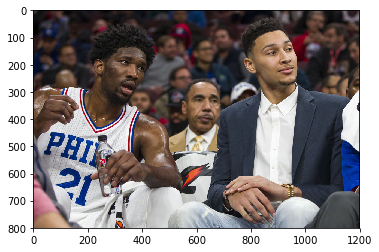

In [21]:
#retrieve and print a selected image
image='embiidandsimmons.png'.replace('+',' ')
print (image)
#make sure that you have the folder path in whatever instance is running this code
folder='/home/ubuntu/ads/hw3/mxnet_mtcnn_face_detection/'
temp_image=folder+'temp_image.png'

key = s3bucket.get_key(image)
#use the same file name for each temp image or you will start getting a ton of photos 
#stored in the folder
#also, if you are using your own bucket, you may need to tweak this code to handle '/'s
key.get_contents_to_filename(temp_image)                                                                  
pil_im = Image.open(temp_image, 'r')
imshow(np.asarray(pil_im))